Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Funct  (None, 3, 3, 1280)        2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 128)               163968    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 38)                4902      
                                

c:\Users\Haitham\.conda\envs\plant_env_full\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2197/2197 [==============================] - 569s 257ms/step - loss: 0.5960 - accuracy: 0.8180 - val_loss: 0.2537 - val_accuracy: 0.9148
Epoch 2/15
2197/2197 [==============================] - 612s 279ms/step - loss: 0.3016 - accuracy: 0.9007 - val_loss: 0.2083 - val_accuracy: 0.9285
Epoch 3/15
2197/2197 [==============================] - 477s 217ms/step - loss: 0.2481 - accuracy: 0.9166 - val_loss: 0.1844 - val_accuracy: 0.9354
Epoch 4/15
2197/2197 [==============================] - 453s 206ms/step - loss: 0.2129 - accuracy: 0.9284 - val_loss: 0.1693 - val_accuracy: 0.9441
Epoch 5/15
2197/2197 [==============================] - 488s 222ms/step - loss: 0.1924 - accuracy: 0.9346 - val_loss: 0.1762 - val_accuracy: 0.9396
Epoch 6/15
2197/2197 [==============================] - 879s 400ms/step - loss: 0.1745 - accuracy: 0.9402 - val_loss: 0.1577 - val_accuracy: 0.9466
Epoch 7/15
2197/2197 [==============================] - 480s 218ms/step - loss: 0.1650 - accuracy: 0.9434 - val_loss: 0.152

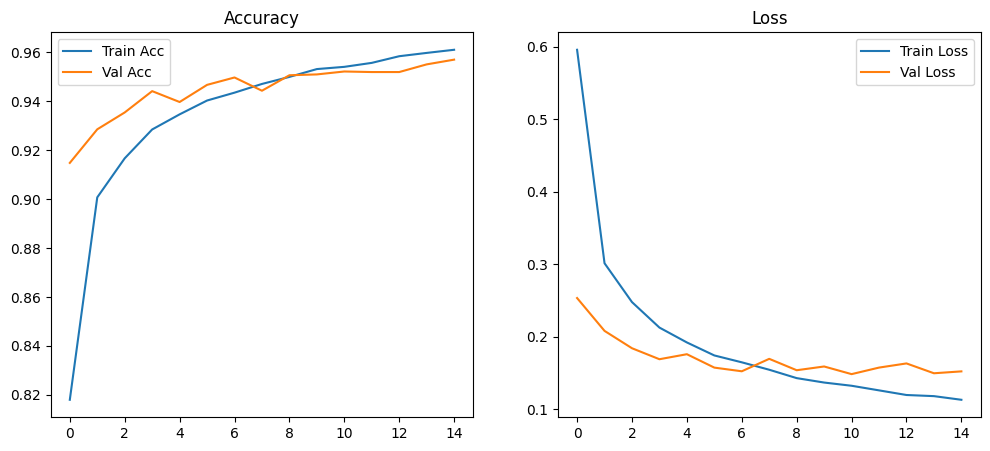

In [5]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ----------------------------
# 1) إعداد الـ Data (كل الصور)
# ----------------------------
train_dir = r"C:\Users\Haitham\Desktop\Plant-Disease-Detection-main\PD\Plant Diseases Dataset\train"
val_dir   = r"C:\Users\Haitham\Desktop\Plant-Disease-Detection-main\PD\Plant Diseases Dataset\valid"

img_size = (96, 96)   # ممكن تخليها 128x128 لو جهازك يتحمل
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size,
    class_mode="categorical", shuffle=True
)
val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size,
    class_mode="categorical", shuffle=False
)

num_classes = len(train_gen.class_indices)

# ----------------------------
# 2) بناء الموديل MobileNetV2
# ----------------------------
def build_mobilenet(num_classes):
    base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(*img_size, 3))
    base_model.trainable = False  # مبدئياً نجمّد الأوزان

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_mobilenet(num_classes)
model.summary()

# ----------------------------
# 3) Callbacks (حفظ أفضل موديل + إيقاف مبكر)
# ----------------------------
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy", mode="max")
earlystop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# ----------------------------
# 4) التدريب
# ----------------------------
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,   # زوّد لـ 20 لو عندك وقت
    callbacks=[checkpoint, earlystop],
    verbose=1
)

# ----------------------------
# 5) رسم Accuracy / Loss
# ----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend(); plt.title("Loss")

plt.show()


In [7]:
model.save("plant_disease_model.keras")
